# Givens Rotations

The Givens rotation Bloqs help count costs for similarity transforming
fermionic ladder operators to produce linear combinations of fermionic ladder operators.

Following notation from Reference [1] we note that a single 
ladder operator can be similarity transformed by a basis rotation to produce a linear 
combination of ladder operators
$$
U(Q)a_{q}U(Q)^{\dagger} = \sum_{p}Q_{pq}^{*}a_{p} = \overrightarrow{a}_{q}\\
U(Q)a_{q}^{\dagger}U(Q)^{\dagger} = \sum_{p}Q_{pq}a_{p}^{\dagger} = 
\overrightarrow{a}_{q}^{\dagger}
$$
Each vector of operators can be implemented by a $N$ (size of basis) Givens rotation unitaries as
$$
V_{\overrightarrow{Q}_{q}} a_{0} V_{\overrightarrow{Q}_{q}}^{\dagger} = 
\overrightarrow{a}_{q} \\
V_{\overrightarrow{Q}_{q}} a_{0}^{\dagger} V_{\overrightarrow{Q}_{q}}^{\dagger} = 
\overrightarrow{a}_{q}^{\dagger}
$$
where 
$$
V_{\overrightarrow{Q}_{q}} = V_{n-1,n-2}(0, \phi_{n-1}) V_{n-2, n-3}(\theta_{n-2}, \phi_{n-2})
V_{n-3,n-4}(\theta_{n-2}, \phi_{n-2})...V_{2, 1}(\theta_{1}, \phi_{1})
V_{1, 0}(\theta_{0}, \phi_{0})
$$
with each $V_{ij}(\theta, \phi) = \mathrm{RZ}_{j}(\pi)\mathrm{R}_{ij}(\theta)$. 
and $1$ Rz rotation for real valued $\overrightarrow{Q}$.


References:
  1.  Vera von Burg, Guang Hao Low, Thomas H ̈aner, Damian S. Steiger, Markus Reiher, 
      Martin Roetteler, and Matthias Troyer, “Quantum computing enhanced computational catalysis,” 
      Phys. Rev. Res. 3, 033055 (2021).

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `RealGivensRotationByPhaseGradient`
Givens rotation corresponding to a 2-fermion mode transformation generated by

$$
    e^{\theta (a_{i}^{\dagger}a_{j} - a_{j}^{\dagger}a_{i})} =  e^{i \theta (YX + XY) / 2}
$$

corresponding to the circuit

    i: ───X───X───S^-1───X───Rz(theta)───X───X───@───────X───S^-1───
              │          │               │       │       │
    j: ───S───@───H──────@───Rz(theta)───@───────X───H───@──────────

The rotation is performed by addition into a phase state and the fractional binary for
$\theta$ is stored in an additional register.

The Toffoli cost for this block comes from the cost of two rotations by addition into
the phase gradient state which which is $2(b_{\mathrm{grad}}-2)$ where $b_{\mathrm{grad}}$
is the size of the phasegradient register.

#### Parameters
 - `phasegrad_bitsize int`: size of phase gradient which is also the size of the register representing the binary fraction of the rotation angle

#### Registers
 - `target_i`: 1st-qubit QBit type register
 - `target_j`: 2nd-qubit Qbit type register
 - `rom_data`: QFxp data representing fractional binary for real part of rotation
 - `phase_gradient`: QFxp data type representing the phase gradient register 

#### References
 - [Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization](     https://arxiv.org/abs/2007.07391). Section II-C: Oracles for phasing by cost function. Appendix A: Addition for controlled rotations


In [2]:
from qualtran.bloqs.chemistry.quad_fermion.givens_bloq import RealGivensRotationByPhaseGradient

### Example Instances

In [3]:
real_givens = RealGivensRotationByPhaseGradient(phasegrad_bitsize=4)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([real_givens],
           ['`real_givens`'])

### Call Graph

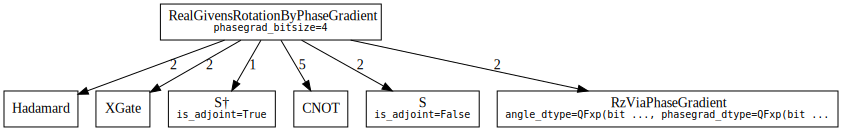

#### Counts totals:
 - `CNOT`: 5
 - `H`: 2
 - `RzViaPhaseGradient`: 2
 - `SGate`: 1
 - `SGate`: 2
 - `XGate`: 2

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
real_givens_g, real_givens_sigma = real_givens.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(real_givens_g)
show_counts_sigma(real_givens_sigma)

## `ComplexGivensRotationByPhaseGradient`
Complex Givens rotation corresponding to a 2-fermion mode transformation generated by

$$
    e^{i \phi n_{j}}e^{\theta (a_{i}^{\dagger}a_{j} - a_{j}^{\dagger}a_{i})} =  e^{i \phi Z_{j}/2}e^{i \theta (YX + XY) / 2}
$$

corresponding to the circuit

    i: ───X───X───S^-1───X───Rz(theta)───X───X───@───────X──S^-1─────
              │          │               │       │       │
    j: ───S───@───H──────@───Rz(theta)───@───────X───H───@──Rz(phi)──

The rotation is performed by addition into a phase state and the fractional binary for
$\theta$ is stored in an additional register.

#### Parameters
 - `phasegrad_bitsize int`: size of phase gradient which is also the size of the register representing the binary fraction of the rotation angles

#### Registers
 - `target_i`: 1st-qubit QBit type register
 - `target_j`: 2nd-qubit Qbit type register
 - `real_rom_data`: QFxp data representing fractional binary for real part of rotation
 - `cplx_rom_data`: QFxp data representing fractional binary for imag part of rotation
 - `phase_gradient`: QFxp data type representing the phase gradient register


In [6]:
from qualtran.bloqs.chemistry.quad_fermion.givens_bloq import ComplexGivensRotationByPhaseGradient

### Example Instances

In [7]:
cplx_givens = ComplexGivensRotationByPhaseGradient(phasegrad_bitsize=4)

#### Graphical Signature

In [8]:
from qualtran.drawing import show_bloqs
show_bloqs([cplx_givens],
           ['`cplx_givens`'])

### Call Graph

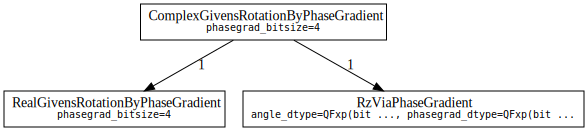

#### Counts totals:
 - `RealGivensRotationByPhaseGradient`: 1
 - `RzViaPhaseGradient`: 1

In [9]:
from qualtran.resource_counting.generalizers import ignore_split_join
cplx_givens_g, cplx_givens_sigma = cplx_givens.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(cplx_givens_g)
show_counts_sigma(cplx_givens_sigma)